<a href="https://colab.research.google.com/github/nodeblackbox/CV-maker/blob/main/CVmakerV7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get update
!sudo apt-get install wkhtmltopdf
!pip install reportlab
!pip install fpdf
!pip install pdf2image
!pip install pymupdf
!pip install ipywidgets
!pip install openai
!pip install --upgrade openai
!apt-get install -y wkhtmltopdf
!pip install pdfkit


Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,284 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,521 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ub

### **🚀 Personalized Job Preparation Assistant Software**

### 🌟 Overview

You can download the full project and use it on github
https://github.com/nodeblackbox/CV-maker

This innovative software is designed to assist in job role research, CV customization, and interview preparation. Utilizing OpenAI's GPT-3.5 model, it offers a comprehensive solution for job seekers to understand job requirements deeply and tailor their applications and interview responses accordingly.

### 🛠️ Features

- **🔍 Job Description Analysis**: Input job descriptions to receive an analysis that includes key skills, responsibilities, and role insights. This helps in customizing your CV to highlight relevant experiences and skills.
- **💬 Interactive Query System**: Ask specific questions about job roles or interview scenarios to get AI-powered advice. This feature is valuable for preparing answers to potential interview questions.
- **📝 CV Customization Guidance**: Based on the job description analysis, receive suggestions on how to tailor your CV for specific job applications, ensuring your application stands out.
- **🤝 Interview Preparation Assistance**: The tool can generate potential interview questions and provide guidance on how to structure effective responses, helping you prepare thoroughly for interviews.
- **📚 Chat History Tracking**: Maintains a record of all interactions, analyses, and advice, making it easy to revisit and refine your job application strategy.

### 🖥️ How It Works

- **🔌 Initialization**: Connects to OpenAI's GPT-3.5 model for AI-powered analysis and advice.
- **📥 Input and Interaction**: Users can input job descriptions for analysis, ask questions about job roles, CV customization, or interview preparation.
- **🧠 Real-Time AI Analysis**: Processes inputs and provides detailed insights and suggestions in real-time.
- **👍 User-Friendly Interface**: Designed with intuitive widgets for easy interaction and navigation.

### 🌈 Benefits

- **🔍 Comprehensive Job Role Understanding**: Gain in-depth insights into job descriptions to tailor your application precisely.
- **📈 Effective CV Customization**: Receive AI-driven advice on how to align your CV with specific job roles.
- **🎯 Targeted Interview Preparation**: Prepare for interviews with AI-generated questions and guidance on crafting strong responses.
- **⏱️ Efficient Preparation Tool**: Streamlines the job preparation process, saving time and increasing effectiveness.
- **🧩 Personalized Experience**: Tailored to your specific needs and goals in job hunting and career advancement.

This software is a powerful aid for any job seeker, providing a unique blend of job role analysis, CV customization, and interview preparation, all powered by advanced AI technology.

In [ ]:
import os
import ipywidgets as widgets
from IPython.display import display

# Create a password widget to accept the API key
api_key_widget = widgets.Password(
    placeholder='Enter OpenAI API Key',
    description='API Key:',
    disabled=False
)

# Function to set the environment variable when the API key is entered
def set_api_key(b):
    os.environ['OPENAI_API_KEY'] = api_key_widget.value
    print("API Key set successfully.")

# Bind the set_api_key function to the 'on_submit' event of the widget
api_key_widget.on_submit(set_api_key)

# Display the widget
display(api_key_widget)


Password(description='API Key:', placeholder='Enter OpenAI API Key')

API Key set successfully.
API Key set successfully.


In [ ]:
import openai
from openai import OpenAI
import os
import ipywidgets as widgets
from IPython.display import display

# Initialize the OpenAI client
client = OpenAI()

# Function to send a message to the OpenAI chat model
def send_message_to_openai(prompt):
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ]
    )
    return response.choices[0].message.content

# Function to analyze job description and handle chat interaction
def process_input(b):
    with output:
        if b.description == 'Analyze':
            description = job_description_input.value
            analysis_result = send_message_to_openai(description)
            chat_history.value += f"Job Description Analysis:\n{analysis_result}\n\n"
            job_description_input.value = ""  # Clear the job description field
        else:
            question = query_input.value
            response = send_message_to_openai(question)
            chat_history.value += f"Q: {question}\nA: {response}\n\n"
            query_input.value = ""  # Clear the query field

# Widgets for job description input
job_description_input = widgets.Textarea(
    placeholder='Paste the job description here...',
    description='Job Description:',
    layout=widgets.Layout(width='100%', height='150px')
)
analyze_button = widgets.Button(
    description='Analyze',
    button_style='primary',
    icon='search'
)

# Widgets for query input
query_input = widgets.Text(
    placeholder='Ask a question about the job...',
    description='Query:',
)
ask_button = widgets.Button(
    description='Ask',
    button_style='info',
    icon='question'
)

# Output area for the chat history
chat_history = widgets.Textarea(
    description='Chat History:',
    layout=widgets.Layout(width='100%', height='300px'),
    disabled=True  # Make the chat history read-only
)

output = widgets.Output()

# Bind buttons to function
analyze_button.on_click(process_input)
ask_button.on_click(process_input)

# Display the widgets
display(job_description_input, analyze_button)
display(query_input, ask_button, chat_history, output)



Textarea(value='', description='Job Description:', layout=Layout(height='150px', width='100%'), placeholder='P…

Button(button_style='primary', description='Analyze', icon='search', style=ButtonStyle())

Text(value='', description='Query:', placeholder='Ask a question about the job...')

Button(button_style='info', description='Ask', icon='question', style=ButtonStyle())

Textarea(value='', description='Chat History:', disabled=True, layout=Layout(height='300px', width='100%'))

Output()

In [ ]:
import openai
from openai import OpenAI
import os
import ipywidgets as widgets
from IPython.display import display

# Initialize the OpenAI client
client = OpenAI()

# Function to send a message to the OpenAI chat model
def send_message_to_openai(prompt):
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ]
    )
    return response.choices[0].message.content

# Initialize a set to store generated questions
generated_questions = set()

# Function to generate and store unique interview questions
def generate_interview_questions(b):
    with output:
        job_description = job_description_input.value
        if job_description:
            prompt = f"Based on the following job description, generate typical interview questions:\n{job_description}"
            interview_questions = send_message_to_openai(prompt)

            # Splitting the generated questions and checking for uniqueness
            questions = interview_questions.split("\n")
            unique_questions = [q for q in questions if q not in generated_questions]
            generated_questions.update(unique_questions)

            # Corrected line for concatenating unique questions
            chat_history.value += "Generated Interview Questions:\n" + '\n'.join(unique_questions) + "\n\n"
            job_description_input.value = ""  # Clear the job description field

# Widgets for job description input
job_description_input = widgets.Textarea(
    placeholder='Paste the job description here...',
    description='Job Description:',
    layout=widgets.Layout(width='100%', height='150px')
)
generate_questions_button = widgets.Button(
    description='Generate Questions',
    button_style='primary',
    icon='question'
)

# Output area for the chat history
chat_history = widgets.Textarea(
    description='Chat History:',
    layout=widgets.Layout(width='100%', height='300px'),
    disabled=True  # Make the chat history read-only
)

output = widgets.Output()

# Bind button to function
generate_questions_button.on_click(generate_interview_questions)

# Display the widgets
display(job_description_input, generate_questions_button, chat_history, output)


Textarea(value='', description='Job Description:', layout=Layout(height='150px', width='100%'), placeholder='P…

Button(button_style='primary', description='Generate Questions', icon='question', style=ButtonStyle())

Textarea(value='', description='Chat History:', disabled=True, layout=Layout(height='300px', width='100%'))

Output()

In [ ]:
import json
from google.colab import files

def load_json(file_content):
    return json.loads(file_content)

def save_json(filename, data):
    with open(filename, 'w') as file:
        json.dump(data, file, indent=4)
    files.download(filename)

def update_json(data, key, subkey, value):
    if key not in data:
        data[key] = {}
    data[key][subkey] = value
    return data

# Upload JSON file
uploaded = files.upload()
filename = next(iter(uploaded))
file_content = uploaded[filename]

# Load JSON data from uploaded file
data = load_json(file_content)

# Example of updating the JSON data
data = update_json(data, 'WorkExperience', 'NewJob', 'Details about new job')

Saving CVattributes.json to CVattributes (4).json


In [ ]:
print(data)

{'TechnicalSkills': {'ProgrammingLanguages': ['JavaScript', 'Java', 'Python', 'TypeScript', 'C#', 'C++', 'C', 'go'], 'FrontEndFrameworks': ['React', 'Vue.js', 'React Native', 'Angular.js', 'Solid.js', 'Next.js', 'Bootstrap', 'Tailwind CSS', 'Quasar', 'Ionic', 'Electron', 'jQuery', 'D3.js', 'Chart.js', 'GSAP', 'SA', 'CSS', 'HTML'], 'BackendFrameworks': ['Express', 'Prisma'], 'AIMachineLearning': ['Deep Learning', 'Neural Networks', 'Data Mining'], 'ITPlatformsSystems': ['AWS', 'Google Cloud Platform', 'ngrok', 'Digital Ocean'], 'ITToolsSoftware': ['Docker', 'Kubernetes', 'Raspberry Pi NAS server setup', 'Remote SSH with Visual Studio Code'], 'SecurityMeasures': ['DDoS Protection', 'SQL Injection Prevention', 'XSS Attack Protection'], 'CloudTechnologies': ['Serverless Computing (Lambda, API Gateway)', 'Microservices Architecture'], 'DevOpsCI/CD': ['Continuous Integration / Continuous Deployment Pipelines'], 'DatabaseTechnologies': ['SQL', 'MongoDB', 'SQLlight', 'PostgreSQL', 'MySQL', 'Ma

In [ ]:
# Save updated data to a file and download it
save_json('updated_json_file.json', data)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import json
import ipywidgets as widgets
from IPython.display import display, clear_output
from google.colab import files

# Global data variable
data = {}

# Function to load JSON data
def load_json(file_content):
    return json.loads(file_content)

# Function to save JSON data
def save_json(filename, data):
    with open(filename, 'w') as file:
        json.dump(data, file, indent=4)
    files.download(filename)

# Styling functions
def style_widget(widget, width='95%', height='auto'):
    widget.layout = widgets.Layout(width=width, height=height, margin='10px 0')
    return widget

# UI Components
section_dd = style_widget(widgets.Dropdown(description='Section:'))
key_dd = style_widget(widgets.Dropdown(description='Key:'))
value_input = style_widget(widgets.Text(placeholder='Enter value', description='Value:'))
list_item_input = style_widget(widgets.Text(placeholder='Enter list item', description='List Item:'))
add_list_item_button = style_widget(widgets.Button(description="Add to List"))
upload_button = style_widget(widgets.FileUpload(description='Upload JSON'))
update_button = style_widget(widgets.Button(description="Update JSON"))
output_area = widgets.Output()

# Display UI
display(section_dd, key_dd, value_input, list_item_input, add_list_item_button, upload_button, update_button, output_area)

# Update dropdown options based on JSON structure
def update_dropdown_options():
    section_dd.options = list(data.keys())
    key_dd.options = list(data.get(section_dd.value, {}).keys())

# Function to update JSON data
def update_json(section, key, value):
    if isinstance(data[section][key], list):
        data[section][key].append(value)
    else:
        data[section][key] = value

# Button click handlers
def on_upload_clicked(change):
    uploaded = upload_button.value
    filename = next(iter(uploaded))
    file_content = uploaded[filename]['content']
    global data
    data = load_json(file_content.decode('utf-8'))
    update_dropdown_options()

def on_update_clicked(b):
    with output_area:
        clear_output()
        if section_dd.value and key_dd.value:
            value = value_input.value.strip()
            if value:
                update_json(section_dd.value, key_dd.value, value)
                save_json('updated_json_file.json', data)
                print(f"Updated {key_dd.value} in {section_dd.value}")
            else:
                print("Please enter a value.")
        else:
            print("Please select a section and a key.")

def on_add_list_item_clicked(b):
    with output_area:
        clear_output()
        if section_dd.value and key_dd.value and list_item_input.value.strip():
            update_json(section_dd.value, key_dd.value, list_item_input.value.strip())
            list_item_input.value = ''
            print(f"Added to {key_dd.value} in {section_dd.value}")
        else:
            print("Please select a section and a key, and enter a list item.")

# Event bindings
upload_button.observe(on_upload_clicked, names='value')
update_button.on_click(on_update_clicked)
add_list_item_button.on_click(on_add_list_item_clicked)
section_dd.observe(lambda change: update_dropdown_options(), names='value')



Dropdown(description='Section:', layout=Layout(height='auto', margin='10px 0', width='95%'), options=(), value…

Dropdown(description='Key:', layout=Layout(height='auto', margin='10px 0', width='95%'), options=(), value=Non…

Text(value='', description='Value:', layout=Layout(height='auto', margin='10px 0', width='95%'), placeholder='…

Text(value='', description='List Item:', layout=Layout(height='auto', margin='10px 0', width='95%'), placehold…

Button(description='Add to List', layout=Layout(height='auto', margin='10px 0', width='95%'), style=ButtonStyl…

FileUpload(value={}, description='Upload JSON', layout=Layout(height='auto', margin='10px 0', width='95%'))

Button(description='Update JSON', layout=Layout(height='auto', margin='10px 0', width='95%'), style=ButtonStyl…

Output()

In [ ]:
print(data)

{'TechnicalSkills': {'ProgrammingLanguages': ['JavaScript', 'Java', 'Python', 'SQL', 'MongoDB', 'React', 'Express', 'Next.js', 'Solid.js', 'p5.js', 'three.js'], 'AIMachineLearning': ['Deep Learning', 'Neural Networks', 'Data Mining'], 'ITPlatformsSystems': ['AWS', 'Google Cloud Platform', 'ngrok', 'Digital Ocean'], 'ITToolsSoftware': ['Docker', 'Kubernetes', 'Raspberry Pi NAS server setup', 'remote SSH with Visual Studio Code'], 'SecurityMeasures': ['DDoS Protection', 'SQL Injection Prevention', 'XSS Attack Protection'], 'FrontEndFrameworks': ['Vue.js', 'React.js'], 'CloudTechnologies': ['Serverless Computing (Lambda, API Gateway)', 'Microservices Architecture'], 'DevOpsCI/CD': ['Continuous Integration / Continuous Deployment Pipelines'], 'DatabaseTechnologies': ['DynamoDB', 'SQL and NoSQL Databases', 'PostgreSQL'], 'OtherSkills': ['Full Stack Development', 'Cloud and Infrastructure', 'Information Security Services']}, 'WorkExperience': {'CupidAI.tech': 'Key contributor in developing a

In [ ]:
# Save updated data to a file and download it
save_json('updated_json_file.json', data)

In [ ]:
import openai
from openai import OpenAI

# Set your OpenAI API key here (replace with your actual key)
os.environ['OPENAI_API_KEY'] = ""

In [ ]:
{
  "TechnicalSkills": {
    "ProgrammingLanguages": [
      "JavaScript", "Java", "Python", "TypeScript", "C#", "C++", "C", "go"
    ],
    "FrontEndFrameworks": [
      "React", "Vue.js", "React Native", "Angular.js", "Solid.js", "Next.js",
      "Bootstrap", "Tailwind CSS", "Quasar", "Ionic", "Electron", "jQuery",
      "D3.js", "Chart.js", "GSAP", "SA", "CSS", "HTML"
    ],
    "BackendFrameworks": [
      "Express", "Prisma"
    ],
    "AIMachineLearning": [
      "Deep Learning", ,"Machine learning", "Neural Networks", "Data Mining"
    ],
    "ITPlatformsSystems": [
      "AWS", "Google Cloud Platform", "ngrok", "Digital Ocean"
    ],
    "ITToolsSoftware": [
      "Docker", "Kubernetes", "Raspberry Pi NAS server setup",
      "Remote SSH with Visual Studio Code"
    ],
    "SecurityMeasures": [
      "DDoS Protection", "SQL Injection Prevention", "XSS Attack Protection"
    ],
    "CloudTechnologies": [
      "Serverless Computing (Lambda, API Gateway)", "Microservices Architecture"
    ],
    "DevOpsCI/CD": [
      "Continuous Integration / Continuous Deployment Pipelines"
    ],
    "DatabaseTechnologies": [
      "SQL", "MongoDB", "SQLlight", "PostgreSQL", "MySQL", "MariaDB",
      "AWS S3", "DynamoDB", "Firebase", "minioS3", "WebRTC", "WebSockets"
    ],
    "ServerManagementTools": [
      "Nginx", "IPTables", "Fail2Ban"
    ],
    "OtherSkills": [
      "Full Stack Development", "Cloud and Infrastructure",
      "Information Security Services"
    ]
  },
  "WorkExperience": {
    "CupidAI.tech": "At CupidAI.tech, instrumental in developing an AI-driven platform for generating ultra-realistic images for social media AI influencers, enhancing their content creation capabilities. Involved in technical development, user engagement strategizing, leading to over 50,000 unique monthly visitors. Demonstrated skills in AI technology, user interface design, and digital marketing strategies.",
    "Only-Fans.uk": "Developed a high-traffic, innovative jump scare website with a unique marketing mechanism. Responsible for the website's entire lifecycle, from conceptualization to deployment and security enhancements. Attracted over 260,000 unique visitors monthly, showcasing abilities in creating engaging, viral content and implementing robust security measures against cyber-attacks.",
    "Nansess.com": "Significant contributor to an open-source Discord bot project, enhancing voice call functionality for over 800,000 users. Role included development, community engagement, and management, demonstrating collaborative work on community-driven projects and expertise in tools enriching digital user interaction.",
    "AmazonFBA": "Managed an e-commerce store, overseeing product sourcing, inventory management, and customer service. Demonstrated business acumen and understanding of e-commerce ecosystems, contributing to store growth and profitability.",
    "ServersManagement": "Managed and maintained 8 servers for e-commerce websites, ensuring high availability and performance. Integrated Stripe API and PayPal for payment processing, enhancing financial security and customer purchasing experience.",
    "WebDevelopment": "Undertook various freelance web development projects, building and optimizing components for client websites. Showcased proficiency in front-end and back-end development, creating responsive, user-friendly web interfaces.",
    "PhotographyGraphicDesign": "Ran a graphics design business, specializing in creating logos, websites, and business cards. Demonstrated creativity and technical skills in Adobe Suite for product labeling and photo editing, providing end-to-end design solutions to clients.",
    "ShopifyeBay": "Built and managed Shopify dropshipping businesses and eBay pre-order systems, demonstrating expertise in e-commerce platforms and digital marketing strategies, leading to successful sales and customer satisfaction.",
    "Teaching": "Conducted private coding lessons and tutorials, simplifying complex concepts and mentoring aspiring developers. Highlighted strong communication skills and commitment to knowledge sharing.",
    "OtherExperience": "Worked as a waiter, developing customer service skills and ability to work efficiently in fast-paced environments. This role honed interpersonal skills and adaptability, valuable in any professional setting."
  },
  "ProjectsAchievements": {
    "CloudBasedGameServer": "Cloud-based Factorio Game Server on AWS",
    "JumpScareWebsite": "Affiliate marketing website with 250,000 monthly visitors",
    "HomeLabWorkshop": "Design and Construction of a Home Lab and Workshop",
    "WebMobileAppProject": "Details about your web/mobile application project.",
    "NASServer": "NAS Server Building using Raspberry Pi",
    "AIImageGeneration": "AI-Driven Image Generation Platform"
  },
  "SoftSkills": [
    "Communication and Interpersonal Skills", "Problem-Solving Abilities",
    "Time Management and Prioritization", "Teamwork and Collaboration",
    "Continuous Improvement Mindset", "Flexibility and Adaptability",
    "Leadership", "Innovative Thinking"
  ],
  "ObjectivesAspirations": {
    "InternshipGoals": "Seeking a software development internship to apply programming skills, particularly in AI and full stack development, and gain industry experience."
  },
  "HobbiesInterests": [
    "Programming", "3D Printing", "Cycling",
    "Building and Maintaining a Home Lab",
    "Maintaining nine of my IONOS servers"
  ]
}

# **Gale–Shapley algorithm Stable Matchmaking System Overview 🚀**

This code snippet is designed to integrate OpenAI's capabilities into a matchmaking system. It leverages the OpenAI API to evaluate job candidates based on their resumes and job descriptions. The script includes functionalities for:

- Initializing the OpenAI client for communication.
- Uploading and processing JSON data containing candidate information.
- Aggregating skills from candidate profiles.
- Dynamically presenting candidate data based on job requirements.
- Evaluating candidate suitability using OpenAI's language model.
- Running matchmaking rounds to determine the best candidate for a job.
- Providing a user interface for uploading candidate data and entering job requirements.

In [ ]:
import json
import ipywidgets as widgets
from IPython.display import display
import openai
from openai import OpenAI
import os

# Initialize the OpenAI client 🚀
client = OpenAI()

# Function to send a message to the OpenAI chat model using the new method 💬
def send_message_to_openai(prompt):
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You're a candidate your job is to make keywords and synonyms Your job is also to make the best keywords and synonyms"},
            {"role": "user", "content": prompt}
        ]
    )
    return response.choices[0].message['content']

# Global variable to store your data 🌍
your_data = {}

# UI for uploading JSON file 📁
upload_json_button = widgets.FileUpload(description="Upload JSON")
display(upload_json_button)

# UI for job description input 📝
job_description_input = widgets.Textarea(description="Job Description")
display(job_description_input)

# Function to load JSON data 📂
def load_json(file_content):
    global your_data
    your_data = json.loads(file_content)

# Function to aggregate skills from JSON data 🧠
def aggregate_skills(technical_skills):
    aggregated_skills = []
    for category, skills in technical_skills.items():
        aggregated_skills.extend(skills)
    return aggregated_skills

# Function to present candidate data 🎤
def candidate_presentation(job_requirement):
    skills = aggregate_skills(your_data['TechnicalSkills'])
    presentation = f"My skills and experiences for the job: {', '.join(skills)}, {your_data['WorkExperience']}, {your_data['ProjectsAchievements']}"
    return send_message_to_openai(presentation)

# Function to evaluate presentation against job requirement 🕵️‍♂️
def hiring_manager_evaluation(presentation, job_requirement):
    evaluation_prompt = f"Assess this candidate for the job requirement '{job_requirement}'. The candidate presents: {presentation}"
    return send_message_to_openai(evaluation_prompt)

# Function to run matchmaking rounds 💞
def matchmaking_rounds(job_description):
    best_match = None
    highest_score = 0

    presentation = candidate_presentation(job_description)
    evaluation = hiring_manager_evaluation(presentation, job_description)

    # Example scoring logic (to be refined) 📊
    score = int(evaluation.split()[0])  # Assuming the evaluation starts with a numeric score
    if score > highest_score:
        highest_score = score
        best_match = job_description

    return best_match, highest_score

# Event handler for the upload button 🖱️
def on_upload_change(change):
    if change.new:
        uploaded_file = upload_json_button.value
        file_name = next(iter(uploaded_file))
        content = uploaded_file[file_name]['content']
        load_json(content.decode('utf-8'))

upload_json_button.observe(on_upload_change, names='value')

# Function to start the matchmaking process 🏁
def run_matchmaking_process(b):
    job_description = job_description_input.value
    best_category, score = matchmaking_rounds(job_description)
    print(f"Best match for job '{job_description}': {best_category} with a score of {score}")

# Button to start matchmaking 🕹️
start_button = widgets.Button(description="Start Matchmaking")
start_button.on_click(run_matchmaking_process)
display(start_button)




FileUpload(value={}, description='Upload JSON')

Textarea(value='', description='Job Description')

Button(description='Start Matchmaking', style=ButtonStyle())

TypeError: ignored

# **Creating a Dynamic and ATS-Optimized CV 📄✨**

This Python script is tailored for crafting a dynamic and Applicant Tracking System (ATS) optimized Curriculum Vitae (CV). The primary objective is to showcase the individual's professional background in a format that is both visually appealing and compliant with automated resume scanning systems used by many recruiters. Key features of the script include:

- **Personal and Professional Details:** Variables are defined to store essential information like name, contact details, LinkedIn, GitHub links, and a personal photo URL.
- **Content Sections:** Distinct sections for the objective, education, skills, experiences, projects, and interests are created. Each section is meticulously crafted to highlight relevant experiences and skill sets.
- **ATS Optimization:** Specialized content for ATS optimization is included invisibly within the HTML. This ensures that the CV is not only human-friendly but also machine-readable, increasing the chances of passing through automated screening processes.
- **HTML to PDF Conversion:** The script employs **`pdfkit`** and **`fitz`** (PyMuPDF) for converting the HTML CV template into a PDF format, ensuring it is ready for both digital submission and printing.
- **Visual Representation:** The CV is rendered as a PDF, allowing for a final review to ensure all details are presented correctly.

The overall goal is to merge technical proficiency with professional presentation, ensuring that the CV stands out in both human and automated reviews.

PDF generated successfully at /content/Your_CV.pdf


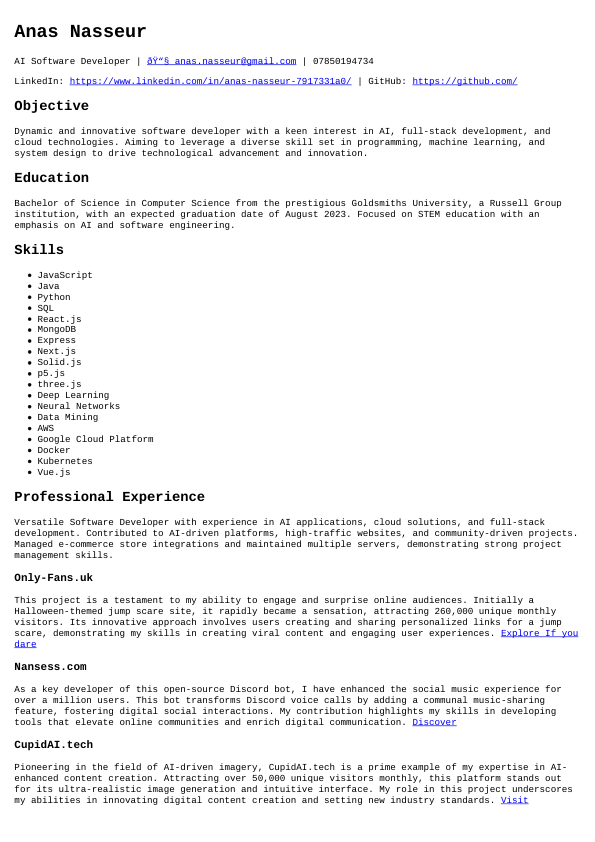

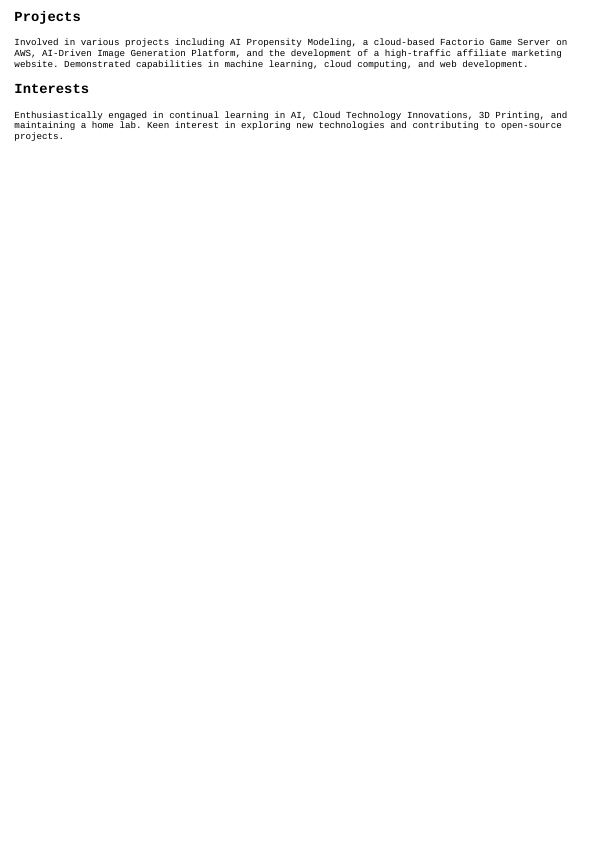

In [ ]:
import pdfkit
import os
import fitz  # PyMuPDF

# Variables for main content
name = "Anas Nasseur"
email = "📧 anas.nasseur@gmail.com"
phone_number = "07850194734"
linkedin_url = "https://www.linkedin.com/in/anas-nasseur-7917331a0/"
github_url = "https://github.com/"
location = "London"
p5 = "https://editor.p5js.org/nodeblackbox/sketches"
githublink = "https://github.com/nodeblackbox"
picture = "https://ibb.co/LhMYNGg"




# Updated CV Content Variables
objective_text = "Dynamic and innovative software developer with a keen interest in AI, full-stack development, and cloud technologies. Aiming to leverage a diverse skill set in programming, machine learning, and system design to drive technological advancement and innovation."
education_text = "Bachelor of Science in Computer Science from the prestigious Goldsmiths University, a Russell Group institution, with an expected graduation date of August 2023. Focused on STEM education with an emphasis on AI and software engineering."
skills_list = ["JavaScript", "Java", "Python", "SQL", "React.js", "MongoDB", "Express", "Next.js", "Solid.js", "p5.js", "three.js", "Deep Learning", "Neural Networks", "Data Mining", "AWS", "Google Cloud Platform", "Docker", "Kubernetes", "Vue.js"]
experience_text = "Versatile Software Developer with experience in AI applications, cloud solutions, and full-stack development. Contributed to AI-driven platforms, high-traffic websites, and community-driven projects. Managed e-commerce store integrations and maintained multiple servers, demonstrating strong project management skills."

# New Experience Variables
experience_1 = "This project is a testament to my ability to engage and surprise online audiences. Initially a Halloween-themed jump scare site, it rapidly became a sensation, attracting 260,000 unique monthly visitors. Its innovative approach involves users creating and sharing personalized links for a jump scare, demonstrating my skills in creating viral content and engaging user experiences."
experience_2 = "As a key developer of this open-source Discord bot, I have enhanced the social music experience for over a million users. This bot transforms Discord voice calls by adding a communal music-sharing feature, fostering digital social interactions. My contribution highlights my skills in developing tools that elevate online communities and enrich digital communication."
experience_3 = "Pioneering in the field of AI-driven imagery, CupidAI.tech is a prime example of my expertise in AI-enhanced content creation. Attracting over 50,000 unique visitors monthly, this platform stands out for its ultra-realistic image generation and intuitive interface. My role in this project underscores my abilities in innovating digital content creation and setting new industry standards."


projects_text = "Involved in various projects including AI Propensity Modeling, a cloud-based Factorio Game Server on AWS, AI-Driven Image Generation Platform, and the development of a high-traffic affiliate marketing website. Demonstrated capabilities in machine learning, cloud computing, and web development."
interests_text = "Enthusiastically engaged in continual learning in AI, Cloud Technology Innovations, 3D Printing, and maintaining a home lab. Keen interest in exploring new technologies and contributing to open-source projects."







# Variables for ATS Optimization
objective_ats = "Software Development, AI, Full Stack Development, Cloud Technologies, Machine Learning"
education_ats = "Russell Group University, Bachelor's Degree, Computer Science, AI"
skills_ats = ".NET, C#, SQL, JavaScript, React.js, Docker, Kubernetes, AWS, Machine Learning, AI, Full Stack Development"

experience_ats = "Software Development, AI Applications, Cloud Solutions, Full Stack Development, E-commerce, Server Management"
# ATS Optimizations for each experience
experience_1_ats = "Online Engagement, Viral Content Creation, User Experience Design, Web Development"
experience_2_ats = "Open-Source Development, Discord Bot, Social Music Experience, Community Building"
experience_3_ats = "AI-Driven Imagery, Content Creation, User Interface Design, Digital Innovation"


projects_ats = "AI Projects, Cloud-Based Development, Machine Learning Implementation, Web Development"
interests_ats = "AI Research, Cloud Technology, Full Stack Development, Open Source Contribution"




# Check if the output directory exists, if not, create it
output_dir = '/content'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# HTML template with placeholders for variables and ATS optimization
html_template = f'''
<!DOCTYPE html>
<html lang="en">
<head>
    <!-- Head content remains unchanged -->
</head>
<body>
    <div class="container">
        <header>
            <h1>{name}</h1>
            <p>AI Software Developer | <a href="mailto:{email}">{email}</a> | {phone_number}</p>
            <p>LinkedIn: <a href="{linkedin_url}" target="_blank">{linkedin_url}</a> | GitHub: <a href="{github_url}" target="_blank">{github_url}</a></p>
        </header>

        <section class="objective">
            <h2 class="section-title">Objective</h2>
            <p>{objective_text}</p>
            <div class="ats-optimization" style="position:absolute; left:-9999px; top:-9999px;">
                <p>{objective_ats}</p>
            </div>
        </section>

        <section class="education">
            <h2 class="section-title">Education</h2>
            <p>{education_text}</p>
            <div class="ats-optimization" style="position:absolute; left:-9999px; top:-9999px;">
                <p>{education_ats}</p>
            </div>
        </section>

        <section class="skills">
            <h2 class="section-title">Skills</h2>
            <ul>
                {''.join([f'<li>{skill}</li>' for skill in skills_list])}
            </ul>
            <div class="ats-optimization" style="position:absolute; left:-9999px; top:-9999px;">
                <p>{skills_ats}</p>
            </div>
        </section>

        <section class="experience">
            <h2 class="section-title">Professional Experience</h2>
            <p>{experience_text}</p>
            <div>
                <h3>Only-Fans.uk</h3>
                <p>{experience_1} <a href="https://only-fans.uk/" target="_blank">Explore If you dare</a></p>
                <div class="ats-optimization" style="position:absolute; left:-9999px; top:-9999px;">
                    <p>{experience_1_ats}</p>
                </div>
            </div>
            <div>
                <h3>Nansess.com</h3>
                <p>{experience_2} <a href="https://nansess.com/" target="_blank">Discover</a></p>
                <div class="ats-optimization" style="position:absolute; left:-9999px; top:-9999px;">
                    <p>{experience_2_ats}</p>
                </div>
            </div>
            <div>
                <h3>CupidAI.tech</h3>
                <p>{experience_3} <a href="https://cupidai.tech/" target="_blank">Visit</a></p>
                <div class="ats-optimization" style="position:absolute; left:-9999px; top:-9999px;">
                    <p>{experience_3_ats}</p>
                </div>
            </div>
            <div class="ats-optimization" style="position:absolute; left:-9999px; top:-9999px;">
                <p>{experience_ats}</p>
            </div>
        </section>

        <section class="projects">
            <h2 class="section-title">Projects</h2>
            <p>{projects_text}</p>
            <div class="ats-optimization" style="position:absolute; left:-9999px; top:-9999px;">
                <p>{projects_ats}</p>
            </div>
        </section>

        <section class="interests">
            <h2 class="section-title">Interests</h2>
            <p>{interests_text}</p>
            <div class="ats-optimization" style="position:absolute; left:-9999px; top:-9999px;">
                <p>{interests_ats}</p>
            </div>
        </section>
    </div>
</body>
</html>
'''

# Convert HTML to PDF
output_pdf_path = '/content/Your_CV.pdf'
try:
    pdfkit.from_string(html_template, output_pdf_path)
    print(f"PDF generated successfully at {output_pdf_path}")
except Exception as e:
    print(f"An error occurred: {e}")

# Display the PDF (optional)
pdf_path = output_pdf_path
doc = fitz.open(pdf_path)
for page_num in range(len(doc)):
    page = doc.load_page(page_num)
    pix = page.get_pixmap()
    img = Image(data=pix.tobytes("png"))
    display(img)
doc.close()

PDF generated successfully at /content/Your_CV.pdf


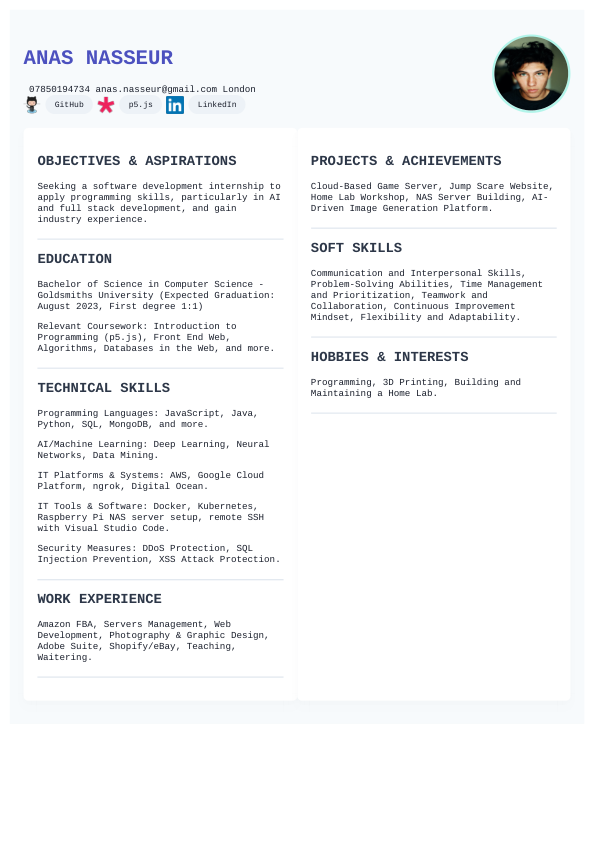

In [ ]:
import pdfkit
import os
import requests


# Check if the output directory exists, if not, create it
output_dir = '/content'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Set up HTML content with your complete CV content
html_content = '''
<!DOCTYPE html>
<html lang="en">
  <head>
    <meta charset="UTF-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1.0" />
    <title>Anas Nasseur - CV</title>
    <style>
      body {
        background-color: #f7fafc;
        color: #1a202c;
        font-family: "Segoe UI", Tahoma, Geneva, Verdana, sans-serif;
      }

      .container {
        max-width: 100%;
        margin-left: auto;
        margin-right: auto;
        padding-left: 1rem;
        padding-right: 1rem;
        padding-top: 2rem;
        padding-bottom: 2rem;
      }

      .flex {
        display: flex;
      }

      .justify-between {
        justify-content: space-between;
      }

      .items-center {
        align-items: center;
      }

      .flex-wrap {
        flex-wrap: wrap;
      }

      .text-4xl {
        font-size: 2.25rem;
      }

      .font-bold {
        font-weight: bold;
      }

      .text-indigo-600 {
        color: #4c51bf;
      }

      .mb-6 {
        margin-bottom: 1.5rem;
      }

      .profile-pic {
        border-radius: 9999px;
        border: 4px solid #b2f5ea;
        width: 128px;
        height: 128px;
        /* Position the profile picture on the right */
        order: 2; /* Flex order to push it to the end */
      }

      .header {
        display: flex;
        justify-content: space-between;
        align-items: center;
        margin-bottom: 24px;
      }

      .social-links {
        display: flex;
        align-items: center;
        gap: 8px;
      }

      .social-link,
      .social-button {
        display: inline-flex;
        align-items: center;
        justify-content: center;
        background-color: #edf2f7;
        border-radius: 9999px;
        padding: 8px 16px;
        text-decoration: none;
        color: #1a202c;
        margin-right: 8px;
      }

      .logo-img {
        width: 30px;
        height: 30px;
        margin-right: 8px;
      }

      .header {
        display: flex;
        justify-content: space-between;
        align-items: center;
        margin-bottom: 24px;
      }

      .header .personal-info {
        display: flex;
        flex-direction: column;
      }

      .header .personal-info h1 {
        color: #4c51bf;
        font-size: 36px;
        font-weight: bold;
        margin: 0;
      }

      .header .contact-info {
        display: flex;
        flex-wrap: wrap;
        gap: 8px;
        font-size: 14px;
        margin-top: 8px;
      }

      .header .social-links {
        display: flex;
        align-items: center;
        gap: 8px;
      }

      .header .social-link {
        display: flex;
        align-items: center;
        background-color: #edf2f7;
        border-radius: 9999px;
        padding: 8px 16px;
        text-decoration: none;
        color: #1a202c;
        font-size: 14px;
      }

      .header .profile-pic {
        border-radius: 9999px;
        border: 4px solid #b2f5ea;
        width: 128px;
        height: 128px;
      }

      .main-content {
        display: flex;
        gap: 24px;
      }

      .column {
        flex: 1;
        background-color: #ffffff;
        box-shadow: 0 10px 15px -3px rgba(0, 0, 0, 0.1),
          0 4px 6px -2px rgba(0, 0, 0, 0.05);
        padding: 24px;
        border-radius: 8px;
      }

      .column-header {
        border-bottom: 2px solid #e2e8f0;
        margin-bottom: 16px;
        padding-bottom: 8px;
      }

      .column-header h2 {
        color: #2d3748;
        font-size: 24px;
        font-weight: 600;
      }

      .profile-pic {
        border-radius: 9999px;
        border: 4px solid #b2f5ea;
        width: 128px;
        height: 128px;
      }
      .social-links {
        display: flex;
        align-items: center;
        gap: 8px;
      }

      .social-link {
        display: flex;
        align-items: center; /* Aligns the logo and the text vertically */
        background-color: #edf2f7;
        border-radius: 9999px;
        padding: 8px 16px;
        text-decoration: none;
        color: #1a202c;
        margin-right: 8px; /* Adjust the space between each link */
      }

      /* Common class for the buttons */
      .social-button {
        display: inline-flex; /* align items in a row */
        align-items: center; /* center items vertically */
        justify-content: center; /* center items horizontally */
        background-color: #edf2f7; /* your preferred background */
        border-radius: 9999px;
        padding: 8px 16px;
        text-decoration: none;
        color: #1a202c;
        margin-right: 8px; /* spacing between buttons */
        /* Additional styles for hover, focus, etc. can be added here */
      }
      /* Additional responsive adjustments if needed */


    </style>
  </head>
  <body class="bg-gray-100 text-gray-800">
    <div class="container">
      <div class="header mb-6">
        <div>
          <h1 class="text-4xl font-bold text-indigo-600">ANAS NASSEUR</h1>
          <div class="flex flex-wrap items-center space-x-4 text-sm mt-3">
            <div>📞 07850194734</div>
            <div>📧 anas.nasseur@gmail.com</div>
            <div>📍 London</div>
          </div>
          <div class="social-links">
            <!-- GitHub Link -->
            <img
              src="https://qph.cf2.quoracdn.net/main-qimg-729a22aba98d1235fdce4883accaf81e"
              alt="GitHub Logo"
              class="logo-img"
            />
            <a
              href="https://github.com/nodeblackbox?tab=repositories"
              target="_blank"
              class="social-link"
            >
              GitHub
            </a>

            <!-- p5.js Link -->
            <img
              src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c6/P5.js_icon.svg/42px-P5.js_icon.svg.png?20210812123459"
              alt="p5.js Logo"
              class="logo-img"
            />
            <a
              href="https://editor.p5js.org/nodeblackbox/sketches"
              target="_blank"
              class="social-link"
            >
              p5.js
            </a>
            <!-- LinkedIn Link -->
            <img
              src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/LinkedIn_logo_initials.png/640px-LinkedIn_logo_initials.png"
              alt="LinkedIn logo"
              class="logo-img"
            />
            <a
              href="https://www.linkedin.com/in/anas-nasseur-7917331a0/"
              target="_blank"
              class="social-link"
            >
              LinkedIn
            </a>
          </div>
        </div>
        <img
          src="https://images.unsplash.com/photo-1499996860823-5214fcc65f8f?q=80&w=1000&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8N3x8aHVtYW58ZW58MHx8MHx8fDA%3D"
          alt="Profile Picture"
          class="profile-pic"
        />
      </div>

      <div class="main-content">
        <!-- Left column content -->
        <div class="column">
          <div class="column-header">
            <h2>OBJECTIVES & ASPIRATIONS</h2>
            <p>
              Seeking a software development internship to apply programming
              skills, particularly in AI and full stack development, and gain
              industry experience.
            </p>
          </div>
          <div class="column-header">
            <h2>EDUCATION</h2>
            <p>
              Bachelor of Science in Computer Science - Goldsmiths University
              (Expected Graduation: August 2023, First degree 1:1)
            </p>
            <p>
              Relevant Coursework: Introduction to Programming (p5.js), Front
              End Web, Algorithms, Databases in the Web, and more.
            </p>
          </div>
          <div class="column-header">
            <h2>TECHNICAL SKILLS</h2>
            <p>
              Programming Languages: JavaScript, Java, Python, SQL, MongoDB, and
              more.
            </p>
            <p>
              AI/Machine Learning: Deep Learning, Neural Networks, Data Mining.
            </p>
            <p>
              IT Platforms & Systems: AWS, Google Cloud Platform, ngrok, Digital
              Ocean.
            </p>
            <p>
              IT Tools & Software: Docker, Kubernetes, Raspberry Pi NAS server
              setup, remote SSH with Visual Studio Code.
            </p>
            <p>
              Security Measures: DDoS Protection, SQL Injection Prevention, XSS
              Attack Protection.
            </p>
          </div>
          <div class="column-header">
            <h2>WORK EXPERIENCE</h2>
            <p>
              Amazon FBA, Servers Management, Web Development, Photography &
              Graphic Design, Adobe Suite, Shopify/eBay, Teaching, Waitering.
            </p>
          </div>
        </div>

        <!-- Right column content -->
        <div class="column">
          <div class="column-header">
            <h2>PROJECTS & ACHIEVEMENTS</h2>
            <p>
              Cloud-Based Game Server, Jump Scare Website, Home Lab Workshop,
              NAS Server Building, AI-Driven Image Generation Platform.
            </p>
          </div>
          <div class="column-header">
            <h2>SOFT SKILLS</h2>
            <p>
              Communication and Interpersonal Skills, Problem-Solving Abilities,
              Time Management and Prioritization, Teamwork and Collaboration,
              Continuous Improvement Mindset, Flexibility and Adaptability.
            </p>
          </div>
          <div class="column-header">
            <h2>HOBBIES & INTERESTS</h2>
            <p>
              Programming, 3D Printing, Building and Maintaining a Home Lab.
            </p>
          </div>
        </div>
      </div>
    </div>
  </body>
</html>
'''  # Your HTML content goes here

# Convert HTML to PDF, outputting the PDF to a writable path
output_pdf_path = '/content/Your_CV.pdf'

try:
    pdfkit.from_string(html_content, output_pdf_path)
    print(f"PDF generated successfully at {output_pdf_path}")
except Exception as e:
    print(f"An error occurred: {e}")

# Returning the path to the generated PDF
output_pdf_path


import fitz  # PyMuPDF
from IPython.display import display, Image
import io

# Path to your PDF file
pdf_path = '/content/Your_CV.pdf'

# Open the PDF
doc = fitz.open(pdf_path)

# Loop through each page
for page_num in range(len(doc)):
    page = doc.load_page(page_num)  # number of page
    pix = page.get_pixmap()
    img = Image(data=pix.tobytes("png"))
    display(img)

doc.close()



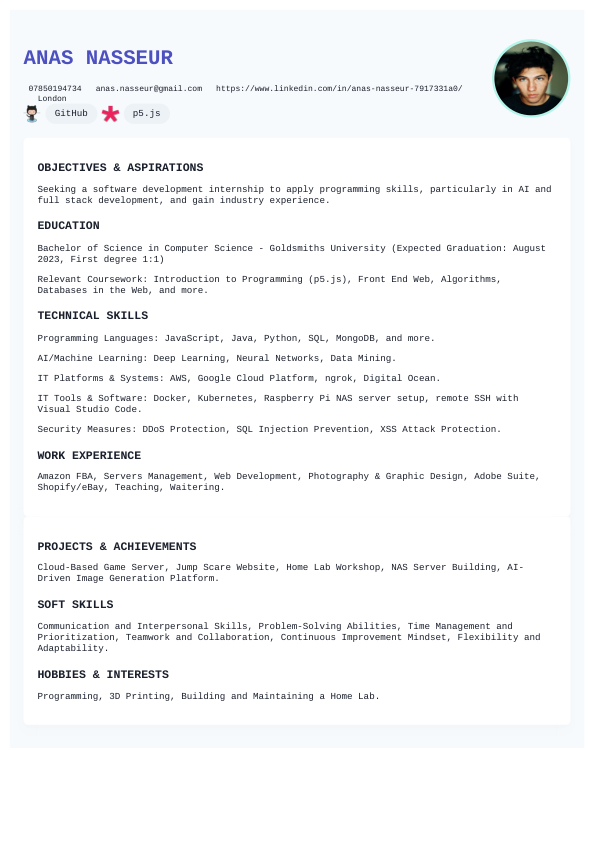

In [ ]:
import fitz  # PyMuPDF
from IPython.display import display, Image
import io

# Path to your PDF file
pdf_path = '/content/Your_CV.pdf'

# Open the PDF
doc = fitz.open(pdf_path)

# Loop through each page
for page_num in range(len(doc)):
    page = doc.load_page(page_num)  # number of page
    pix = page.get_pixmap()
    img = Image(data=pix.tobytes("png"))
    display(img)

doc.close()


PDF generated successfully at /content/Your_CV.pdf


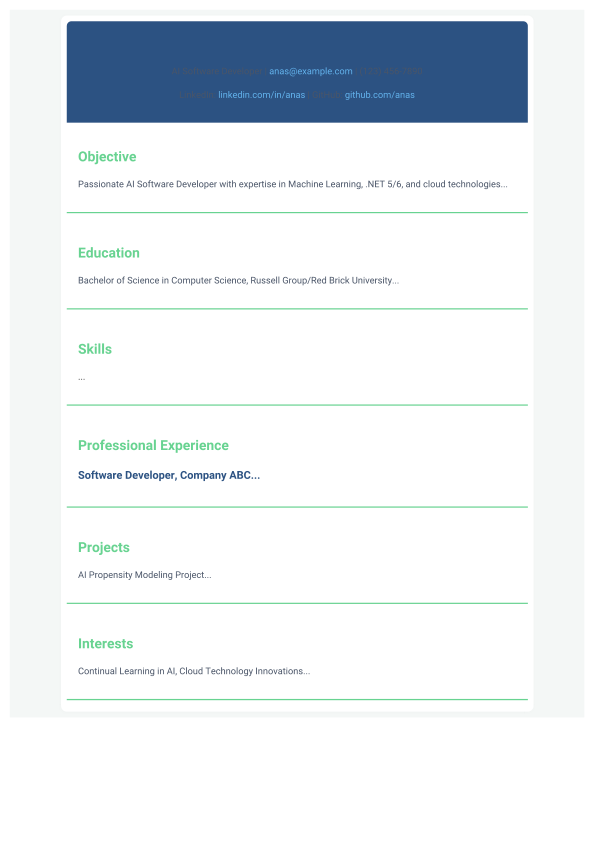

In [ ]:
import pdfkit
import os
import requests


# Check if the output directory exists, if not, create it
output_dir = '/content'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Set up HTML content with your complete CV content
html_content = '''



<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1.0" />
    <meta name="description" content="Anas Nasseur's CV - AI Software Developer skilled in .NET 5/6, Machine Learning, C#, SQL, JavaScript, TypeScript, React.js, Docker, Kubernetes, NoSQL, and Cloud Computing.">
    <title>Anas Nasseur - AI Software Developer CV</title>
    <link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&display=swap" rel="stylesheet">
    <style>
        body {
            background-color: #f4f7f6;
            color: #333;
            font-family: "Roboto", sans-serif;
            font-size: 16px;
            line-height: 1.6;
            margin: 0;
            padding: 0;
        }

        .container {
            max-width: 800px;
            margin: 20px auto;
            padding: 20px;
            background-color: #ffffff;
            box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);
            border-radius: 10px;
        }

        header {
            background-color: #2c5282;
            color: #fff;
            padding: 20px;
            border-radius: 8px 8px 0 0;
            text-align: center;
        }

        section {
            padding: 20px;
            border-bottom: 2px solid #68d391;
            margin-bottom: 10px;
        }

        h1, h2, h3 {
            color: #2c5282;
        }

        h1 {
            margin: 0;
            font-size: 24px;
        }

        h2.section-title {
            color: #68d391;
            margin-bottom: 10px;
        }

        a {
            color: #63b3ed;
            text-decoration: none;
        }

        a:hover {
            text-decoration: underline;
        }

        p, li {
            color: #4a5568;
        }

        ul {
            list-style-type: none;
            padding: 0;
        }

        li:before {
            content: "• ";
            color: #68d391;
        }

        @media (max-width: 768px) {
            .container {
                width: 100%;
                margin: 10px auto;
                padding: 10px;
            }
        }
    </style>
</head>
<body>
    <div class="container">
        <header>
            <h1>Anas Nasseur</h1>
            <p>AI Software Developer | <a href="mailto:anas@example.com">anas@example.com</a> | (123) 456-7890</p>
            <p>LinkedIn: <a href="https://linkedin.com/in/anas" target="_blank">linkedin.com/in/anas</a> | GitHub: <a href="https://github.com/anas" target="_blank">github.com/anas</a></p>
        </header>

        <section class="objective">
            <h2 class="section-title">Objective</h2>
            <p>Passionate AI Software Developer with expertise in Machine Learning, .NET 5/6, and cloud technologies...</p>
            <div class="ats-optimization" style="position:absolute; left:-9999px; top:-9999px;">
                <p>AI Development, Machine Learning, Cloud Computing, Software Engineering, Technology Innovation</p>
            </div>
        </section>

        <section class="education">
            <h2 class="section-title">Education</h2>
            <p>Bachelor of Science in Computer Science, Russell Group/Red Brick University...</p>
            <div class="ats-optimization" style="position:absolute; left:-9999px; top:-9999px;">
                <p>Russell Group University, Bachelor's Degree, Computer Science, STEM Education</p>
            </div>
        </section>

        <section class="skills">
            <h2 class="section-title">Skills</h2>
            <ul>...</ul>
            <div class="ats-optimization" style="position:absolute; left:-9999px; top:-9999px;">
                <p>.NET, C#, SQL, JavaScript, React.js, Docker, Kubernetes, NoSQL, Machine Learning, AI, Cloud Computing</p>
            </div>
        </section>

        <section class="experience">
            <h2 class="section-title">Professional Experience</h2>
            <h3>Software Developer, Company ABC...</h3>
            <div class="ats-optimization" style="position:absolute; left:-9999px; top:-9999px;">
                <p>Software Development, AI Applications, Cloud Solutions, Machine Learning Algorithms, .NET Framework, Project Management</p>
            </div>
        </section>

        <section class="projects">
            <h2 class="section-title">Projects</h2>
            <p>AI Propensity Modeling Project...</p>
            <div class="ats-optimization" style="position:absolute; left:-9999px; top:-9999px;">
                <p>AI Projects, Propensity Modeling, .NET Development, Machine Learning Implementation</p>
            </div>
        </section>

        <section class="interests">
            <h2 class="section-title">Interests</h2>
            <p>Continual Learning in AI, Cloud Technology Innovations...</p>
            <div class="ats-optimization" style="position:absolute; left:-9999px; top:-9999px;">
                <p>AI Research, Cloud Technology, Open Source Contribution, Technological Advancements</p>
            </div>
        </section>

    </div>
</body>
</html>




'''  # Your HTML content goes here

# Convert HTML to PDF, outputting the PDF to a writable path
output_pdf_path = '/content/Your_CV.pdf'

try:
    pdfkit.from_string(html_content, output_pdf_path)
    print(f"PDF generated successfully at {output_pdf_path}")
except Exception as e:
    print(f"An error occurred: {e}")

# Returning the path to the generated PDF
output_pdf_path


import fitz  # PyMuPDF
from IPython.display import display, Image
import io

# Path to your PDF file
pdf_path = '/content/Your_CV.pdf'

# Open the PDF
doc = fitz.open(pdf_path)

# Loop through each page
for page_num in range(len(doc)):
    page = doc.load_page(page_num)  # number of page
    pix = page.get_pixmap()
    img = Image(data=pix.tobytes("png"))
    display(img)

doc.close()



PDF generated successfully at /content/Your_CV.pdf


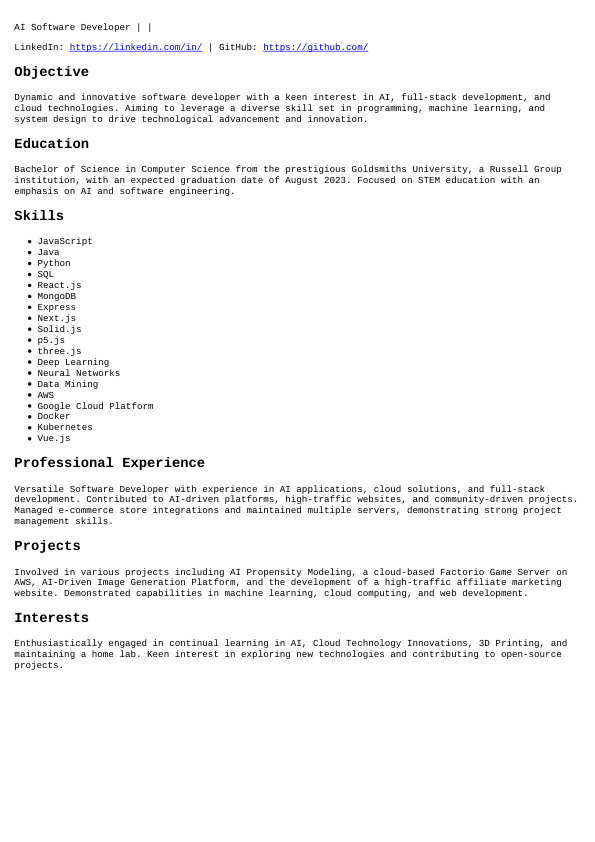

In [ ]:
import pdfkit
import os
import fitz  # PyMuPDF

# Variables for main content
name = ""
email = ""
phone_number = ""
linkedin_url = "https://linkedin.com/in/"
github_url = "https://github.com/"



# Updated CV Content Variables
objective_text = "Dynamic and innovative software developer with a keen interest in AI, full-stack development, and cloud technologies. Aiming to leverage a diverse skill set in programming, machine learning, and system design to drive technological advancement and innovation."
education_text = "Bachelor of Science in Computer Science from the prestigious Goldsmiths University, a Russell Group institution, with an expected graduation date of August 2023. Focused on STEM education with an emphasis on AI and software engineering."
skills_list = ["JavaScript", "Java", "Python", "SQL", "React.js", "MongoDB", "Express", "Next.js", "Solid.js", "p5.js", "three.js", "Deep Learning", "Neural Networks", "Data Mining", "AWS", "Google Cloud Platform", "Docker", "Kubernetes", "Vue.js"]
experience_text = "Versatile Software Developer with experience in AI applications, cloud solutions, and full-stack development. Contributed to AI-driven platforms, high-traffic websites, and community-driven projects. Managed e-commerce store integrations and maintained multiple servers, demonstrating strong project management skills."
projects_text = "Involved in various projects including AI Propensity Modeling, a cloud-based Factorio Game Server on AWS, AI-Driven Image Generation Platform, and the development of a high-traffic affiliate marketing website. Demonstrated capabilities in machine learning, cloud computing, and web development."
interests_text = "Enthusiastically engaged in continual learning in AI, Cloud Technology Innovations, 3D Printing, and maintaining a home lab. Keen interest in exploring new technologies and contributing to open-source projects."

# Variables for ATS Optimization
objective_ats = "Software Development, AI, Full Stack Development, Cloud Technologies, Machine Learning"
education_ats = "Russell Group University, Bachelor's Degree, Computer Science, AI"
skills_ats = ".NET, C#, SQL, JavaScript, React.js, Docker, Kubernetes, AWS, Machine Learning, AI, Full Stack Development"
experience_ats = "Software Development, AI Applications, Cloud Solutions, Full Stack Development, E-commerce, Server Management"
projects_ats = "AI Projects, Cloud-Based Development, Machine Learning Implementation, Web Development"
interests_ats = "AI Research, Cloud Technology, Full Stack Development, Open Source Contribution"

# Check if the output directory exists, if not, create it
output_dir = '/content'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# HTML template with placeholders for variables and ATS optimization
html_template = f'''
<!DOCTYPE html>
<html lang="en">
<head>
    <!-- Head content remains unchanged -->
</head>
<body>
    <div class="container">
        <header>
            <h1>{name}</h1>
            <p>AI Software Developer | <a href="mailto:{email}">{email}</a> | {phone_number}</p>
            <p>LinkedIn: <a href="{linkedin_url}" target="_blank">{linkedin_url}</a> | GitHub: <a href="{github_url}" target="_blank">{github_url}</a></p>
        </header>

        <section class="objective">
            <h2 class="section-title">Objective</h2>
            <p>{objective_text}</p>
            <div class="ats-optimization" style="position:absolute; left:-9999px; top:-9999px;">
                <p>{objective_ats}</p>
            </div>
        </section>

        <section class="education">
            <h2 class="section-title">Education</h2>
            <p>{education_text}</p>
            <div class="ats-optimization" style="position:absolute; left:-9999px; top:-9999px;">
                <p>{education_ats}</p>
            </div>
        </section>

        <section class="skills">
            <h2 class="section-title">Skills</h2>
            <ul>
                {''.join([f'<li>{skill}</li>' for skill in skills_list])}
            </ul>
            <div class="ats-optimization" style="position:absolute; left:-9999px; top:-9999px;">
                <p>{skills_ats}</p>
            </div>
        </section>

        <section class="experience">
            <h2 class="section-title">Professional Experience</h2>
            <p>{experience_text}</p>
            <div class="ats-optimization" style="position:absolute; left:-9999px; top:-9999px;">
                <p>{experience_ats}</p>
            </div>
        </section>

        <section class="projects">
            <h2 class="section-title">Projects</h2>
            <p>{projects_text}</p>
            <div class="ats-optimization" style="position:absolute; left:-9999px; top:-9999px;">
                <p>{projects_ats}</p>
            </div>
        </section>

        <section class="interests">
            <h2 class="section-title">Interests</h2>
            <p>{interests_text}</p>
            <div class="ats-optimization" style="position:absolute; left:-9999px; top:-9999px;">
                <p>{interests_ats}</p>
            </div>
        </section>
    </div>
</body>
</html>
'''

# Convert HTML to PDF
output_pdf_path = '/content/Your_CV.pdf'
try:
    pdfkit.from_string(html_template, output_pdf_path)
    print(f"PDF generated successfully at {output_pdf_path}")
except Exception as e:
    print(f"An error occurred: {e}")

# Display the PDF (optional)
pdf_path = output_pdf_path
doc = fitz.open(pdf_path)
for page_num in range(len(doc)):
    page = doc.load_page(page_num)
    pix = page.get_pixmap()
    img = Image(data=pix.tobytes("png"))
    display(img)
doc.close()



In [ ]:
!pip install google-api-python-client

In [ ]:
import os

# Set the OpenAI API key environment variable
os.environ['OPENAI_API_KEY'] = 'Your API key here'


In [ ]:
import ipywidgets as widgets
from IPython.display import display
import json


In [ ]:
# Personal Details
name = widgets.Text(description='Name:')
email = widgets.Text(description='Email:')

# Skills
skills = widgets.Textarea(description='Skills:', placeholder='List your skills...')

# Achievements
achievements = widgets.Textarea(description='Achievements:', placeholder='List your achievements...')

# Credentials
credentials = widgets.Textarea(description='Credentials:', placeholder='List your credentials...')

# Job Listing Analysis
job_skills_required = widgets.Textarea(description='Required Skills:', placeholder='Skills required for the job...')
job_desirable_qualifications = widgets.Textarea(description='Desirable Qualifications:', placeholder='Desirable qualifications...')

# CV Tailoring
cv_customization = widgets.Textarea(description='CV Customization:', placeholder='How will you tailor your CV...')

# Buttons
save_button = widgets.Button(description='Save to JSON')
upload_button = widgets.FileUpload(description='Upload JSON')


In [ ]:
def save_to_json(b):
    data = {
        'name': name.value,
        'email': email.value,
        'skills': skills.value,
        'achievements': achievements.value,
        'credentials': credentials.value,
        'job_skills_required': job_skills_required.value,
        'job_desirable_qualifications': job_desirable_qualifications.value,
        'cv_customization': cv_customization.value
    }
    with open('/mnt/data/CV_data.json', 'w') as f:
        json.dump(data, f)
    print('Data saved to CV_data.json')

def load_from_json(change):
    upload = list(upload_button.value.values())[0]
    content = json.loads(upload['content'])
    name.value = content.get('name', '')
    email.value = content.get('email', '')
    skills.value = content.get('skills', '')
    achievements.value = content.get('achievements', '')
    credentials.value = content.get('credentials', '')
    job_skills_required.value = content.get('job_skills_required', '')
    job_desirable_qualifications.value = content.get('job_desirable_qualifications', '')
    cv_customization.value = content.get('cv_customization', '')

save_button.on_click(save_to_json)
upload_button.observe(load_from_json, names='value')


In [ ]:
display(name, email, skills, achievements, credentials, job_skills_required, job_desirable_qualifications, cv_customization, save_button, upload_button)


Text(value='', description='Name:')

Text(value='', description='Email:')

Textarea(value='', description='Skills:', placeholder='List your skills...')

Textarea(value='', description='Achievements:', placeholder='List your achievements...')

Textarea(value='', description='Credentials:', placeholder='List your credentials...')

Textarea(value='', description='Required Skills:', placeholder='Skills required for the job...')

Textarea(value='', description='Desirable Qualifications:', placeholder='Desirable qualifications...')

Textarea(value='', description='CV Customization:', placeholder='How will you tailor your CV...')

Button(description='Save to JSON', style=ButtonStyle())

FileUpload(value={}, description='Upload JSON')

In [ ]:
import pdfkit
import requests
# Set up your HTML and CSS content
html_content = '''

<!DOCTYPE html>
<html lang="en">
  <head>
    <meta charset="UTF-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1.0" />
    <title>Anas Nasseur - CV</title>
  </head>

  <style>

    body {
      background-color: #f7fafc;
      color: #1a202c;
      font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    }
    .header {
      display: flex;
      justify-content: space-between;
      align-items: center;
      margin-bottom: 24px;
    }

    .personal-info h1 {
      color: #4c51bf;
      font-size: 36px;
      font-weight: bold;
    }

    .contact-info {
      font-size: 14px;
    }



    .social-link {
      display: inline-block;
      background-color: #edf2f7;
      border-radius: 9999px;
      padding: 8px 16px;
      text-decoration: none;
      color: #1a202c;
    }

    .profile-pic {
      border-radius: 9999px;
      border: 4px solid #b2f5ea;
      width: 128px;
      height: 128px;
    }

    .section {
      background-color: #ffffff;
      box-shadow: 0 10px 15px -3px rgba(0, 0, 0, 0.1), 0 4px 6px -2px rgba(0, 0, 0, 0.05);
      padding: 24px;
      margin-bottom: 16px;
      border-radius: 8px;
    }

    .section + .section {
      border-top: 2px solid #e2e8f0;
    }

    .section h2 {
      color: #2d3748;
      font-size: 24px;
      font-weight: 600;
      margin-bottom: 8px;
    }

    /*  */

    .container {
      max-width: 100%;
      margin-left: auto;
      margin-right: auto;
      padding-left: 1rem;
      padding-right: 1rem;
      padding-top: 2rem;
      padding-bottom: 2rem;
    }
    .flex {
      display: flex;
    }
    .justify-between {
      justify-content: space-between;
    }
    .items-center {
      align-items: center;
    }
    .flex-wrap {
      flex-wrap: wrap;
    }

    /* @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ */

    .text-4xl {
      font-size: 2.25rem; /* Adjust size as needed */
    }
    .font-bold {
      font-weight: bold;
    }
    .text-indigo-600 {
      color: #4C51BF; /* Tailwind Indigo-600 color */
    }
    .text-sm {
      font-size: 0.875rem;
    }
    .text-xl {
      font-size: 1.25rem;
    }
    .font-semibold {
      font-weight: 600;
    }

    /* @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ */

    .bg-gray-100 {
      background-color: #f7fafc;
    }
    .bg-white {
      background-color: #ffffff;
    }
    .rounded-lg {
      border-radius: 0.5rem;
    }
    .p-6 {
      padding: 1.5rem;
    }
    .border-b-2 {
      border-bottom-width: 2px;
    }
    .mb-6 {
      margin-bottom: 1.5rem;
    }
    .shadow-lg {
      box-shadow: 0 10px 15px -3px rgba(0, 0, 0, 0.1), 0 4px 6px -2px rgba(0, 0, 0, 0.05);
    }

    /* @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ */

    .space-x-4 > * + * {
      margin-left: 1rem;
    }
    .grid {
      display: grid;
    }
    .grid-cols-1 {
      grid-template-columns: repeat(1, minmax(0, 1fr));
    }
    @media (min-width: 768px) { /* Tailwind's medium breakpoint */
      .md\:grid-cols-2 {
        grid-template-columns: repeat(2, minmax(0, 1fr));
      }
    }
    .gap-6 {
      grid-gap: 1.5rem;
    }
    .profile-pic {
      border-radius: 9999px;
      border: 4px solid #b2f5ea;
      width: 128px;
      height: 128px;
    }
    .social-links {
      display: flex;
      align-items: center;
      gap: 8px;
    }

    .social-link {
      display: flex;
      align-items: center; /* Aligns the logo and the text vertically */
      background-color: #edf2f7;
      border-radius: 9999px;
      padding: 8px 16px;
      text-decoration: none;
      color: #1a202c;
      margin-right: 8px; /* Adjust the space between each link */
    }

    .logo-img {
      width: 30px; /* Adjust the size as needed */
      height: 30px; /* Adjust the size as needed */
      margin-right: 8px; /* Adds space between the logo and the text */
    }

    /* Common class for the buttons */
    .social-button {
      display: inline-flex; /* align items in a row */
      align-items: center; /* center items vertically */
      justify-content: center; /* center items horizontally */
      background-color: #edf2f7; /* your preferred background */
      border-radius: 9999px;
      padding: 8px 16px;
      text-decoration: none;
      color: #1a202c;
      margin-right: 8px; /* spacing between buttons */
      /* Additional styles for hover, focus, etc. can be added here */
    }
  </style>
  <body class="bg-gray-100 text-gray-800">
    <div class="container">
      <div class="flex justify-between items-center mb-6">
        <div>
          <h1 class="text-4xl font-bold text-indigo-600">ANAS NASSEUR</h1>
          <div class="flex flex-wrap items-center space-x-4 text-sm mt-3">
            <div>📞 07850194734</div>
            <div>📧 anas.nasseur@gmail.com</div>
            <div>🔗 https://www.linkedin.com/in/anas-nasseur-7917331a0/</div>
            <div>📍 London</div>
          </div>
          <div class="social-links">
            <!-- GitHub Link -->
            <img
              src="https://qph.cf2.quoracdn.net/main-qimg-729a22aba98d1235fdce4883accaf81e"
              alt="GitHub Logo"
              class="logo-img"
            />
            <a
              href="https://github.com/nodeblackbox?tab=repositories"
              target="_blank"
              class="social-link"
            >
              GitHub
            </a>

            <!-- p5.js Link -->
            <img
              src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c6/P5.js_icon.svg/42px-P5.js_icon.svg.png?20210812123459"
              alt="p5.js Logo"
              class="logo-img"
            />
            <a
              href="https://editor.p5js.org/nodeblackbox/sketches"
              target="_blank"
              class="social-link"
            >
              p5.js
            </a>
          </div>
        </div>
        <!--       <img src="https://images.unsplash.com/photo-1499996860823-5214fcc65f8f?q=80&w=1000&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8N3x8aHVtYW58ZW58MHx8MHx8fDA%3D" alt="Profile Picture" class="w-32 h-32 rounded-full border-4 border-indigo-300"> -->
        <img
          src="https://images.unsplash.com/photo-1499996860823-5214fcc65f8f?q=80&w=1000&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8N3x8aHVtYW58ZW58MHx8MHx8fDA%3D"
          alt="Profile Picture"
          class="profile-pic"
        />
      </div>

      <div class="grid grid-cols-1 md:grid-cols-2 gap-6">
        <div class="bg-white shadow-lg rounded-lg p-6">
          <!-- SUMMARY -->
          <div class="border-b-2 pb-3 mb-6">
            <h2 class="text-xl font-semibold mb-2">OBJECTIVES & ASPIRATIONS</h2>
            <p>
              Seeking a software development internship to apply programming
              skills, particularly in AI and full stack development, and gain
              industry experience.
            </p>
          </div>

          <!-- EDUCATION -->
          <div class="border-b-2 pb-3 mb-6">
            <h2 class="text-xl font-semibold mb-2">EDUCATION</h2>
            <p class="mb-2">
              Bachelor of Science in Computer Science - Goldsmiths University
              (Expected Graduation: August 2023, First degree 1:1)
            </p>
            <p>
              Relevant Coursework: Introduction to Programming (p5.js), Front
              End Web, Algorithms, Databases in the Web, and more.
            </p>
          </div>

          <!-- TECHNICAL SKILLS -->
          <div class="border-b-2 pb-3 mb-6">
            <h2 class="text-xl font-semibold mb-2">TECHNICAL SKILLS</h2>
            <p>
              Programming Languages: JavaScript, Java, Python, SQL, MongoDB, and
              more.
            </p>
            <p>
              AI/Machine Learning: Deep Learning, Neural Networks, Data Mining.
            </p>
            <p>
              IT Platforms & Systems: AWS, Google Cloud Platform, ngrok, Digital
              Ocean.
            </p>
            <p>
              IT Tools & Software: Docker, Kubernetes, Raspberry Pi NAS server
              setup, remote SSH with Visual Studio Code.
            </p>
            <p>
              Security Measures: DDoS Protection, SQL Injection Prevention, XSS
              Attack Protection.
            </p>
          </div>

          <!-- WORK EXPERIENCE -->
          <div>
            <h2 class="text-xl font-semibold mb-2">WORK EXPERIENCE</h2>
            <p>
              Amazon FBA, Servers Management, Web Development, Photography &
              Graphic Design, Adobe Suite, Shopify/eBay, Teaching, Waitering.
            </p>
          </div>
        </div>

        <div class="bg-white shadow-lg rounded-lg p-6">
          <!-- PROJECTS & ACHIEVEMENTS -->
          <div class="border-b-2 pb-3 mb-6">
            <h2 class="text-xl font-semibold mb-2">PROJECTS & ACHIEVEMENTS</h2>
            <p>
              Cloud-Based Game Server, Jump Scare Website, Home Lab Workshop,
              NAS Server Building, AI-Driven Image Generation Platform.
            </p>
          </div>
          <!-- SOFT SKILLS -->
          <div class="border-b-2 pb-3 mb-6">
            <h2 class="text-xl font-semibold mb-2">SOFT SKILLS</h2>
            <p>
              Communication and Interpersonal Skills, Problem-Solving Abilities,
              Time Management and Prioritization, Teamwork and Collaboration,
              Continuous Improvement Mindset, Flexibility and Adaptability.
            </p>
          </div>

          <!-- HOBBIES & INTERESTS -->
          <div>
            <h2 class="text-xl font-semibold mb-2">HOBBIES & INTERESTS</h2>
            <p>
              Programming, 3D Printing, Building and Maintaining a Home Lab.
            </p>
          </div>
        </div>
      </div>
    </div>
  </body>
</html>

'''

# Convert HTML to PDF
pdfkit.from_string(html_content, '/content/Your_CV.pdf')


True

In [ ]:
!sudo apt-get install apt-transport-https ca-certificates gnupg curl sudo

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ca-certificates is already the newest version (20230311ubuntu0.22.04.1).
curl is already the newest version (7.81.0-1ubuntu1.14).
gnupg is already the newest version (2.2.27-3ubuntu2.1).
gnupg set to manually installed.
sudo is already the newest version (1.9.9-1ubuntu2.4).
The following NEW packages will be installed:
  apt-transport-https
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 1,510 B of archives.
After this operation, 170 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 apt-transport-https all 2.4.11 [1,510 B]
Fetched 1,510 B in 0s (5,338 B/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Rea

In [ ]:
!gcloud init

Welcome! This command will take you through the configuration of gcloud.

Settings from your current configuration [default] are:
component_manager:
  disable_update_check: 'True'
compute:
  gce_metadata_read_timeout_sec: '0'

Pick configuration to use:
 [1] Re-initialize this configuration [default] with new settings 
 [2] Create a new configuration
Please enter your numeric choice:  

Command killed by keyboard interrupt

^C


In [ ]:
!pip install --upgrade google-api-python-client
!pip install google-cloud-talent
!gcloud auth application-default login


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 39.7 MB/s eta 0:00:00
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 2.84.0
    Uninstalling google-api-python-client-2.84.0:
      Successfully uninstalled google-api-python-client-2.84.0


### **Guide for Using Service Account Key in Google Colab**

### Step 1: Upload the Service Account Key to Google Colab

1. In your Google Colab notebook, run the following code cell to upload your service account key:

In [ ]:
from google.colab import files
import os

# Upload the service account key JSON file
uploaded = files.upload()

# Assuming the user uploads a single JSON file, get the file name
file_name = next(iter(uploaded))
print(f"Uploaded file: {file_name}")

# Set the environment variable for authentication
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = file_name

After running this cell, use the file dialog to select and upload the **`fluent-limiter-367420-b727c9f82ee6.json`** file from your computer.

### Step 2: Install the Cloud Talent Solution Client Library

1. Run the following command in a new cell to install the Cloud Talent Solution client library:

In [ ]:
!pip install google-cloud-talent

### Step 3: Define the Function and Variables

1. Define the function for the basic keyword search and fill in the variables:

In [ ]:
from google.cloud import talent
from google.cloud.talent_v4.services.job_service import JobServiceClient
from google.cloud.talent_v4.types import RequestMetadata, JobQuery, SearchJobsRequest

# Initialize the client service
client_service = JobServiceClient()

# Replace 'your-project-id' with your actual project ID
project_id = "fluent-limiter-367420"
parent = f"projects/{project_id}"

# Define the basic keyword search function
def basic_keyword_search(client_service, company_name, keyword):
    # Replace 'HashedUserId' and 'HashedSessionId' with actual hashed user and session IDs
    request_metadata = RequestMetadata(
        user_id="HashedUserId",
        session_id="HashedSessionId",
        domain="www.google.com"
    )
    job_query = JobQuery(query=keyword)
    if company_name is not None:
        job_query.company_names = [company_name]

    # Create the search jobs request
    request = SearchJobsRequest(
        parent=parent,
        request_metadata=request_metadata,
        job_query=job_query,
        search_mode=SearchJobsRequest.SearchMode.JOB_SEARCH
    )

    # Execute the search request
    response = client_service.search_jobs(request=request)

    # Print the response
    print(response)

I was getting no results at all which was really weird this is the  version 4 API And I realized that they don't have any Output which was really weird it's either no job website so I use in this service or this API is deprecated

In [ ]:
from google.cloud import talent_v4
from google.cloud.talent_v4 import JobServiceClient
from google.cloud.talent_v4.types import RequestMetadata, JobQuery, SearchJobsRequest

def search_jobs_test(client_service, keyword):
    project_id = "fluent-limiter-367420"  # Replace with your project ID
    parent = f"projects/{project_id}"

    request_metadata = RequestMetadata(
        user_id="test_user_id",
        session_id="test_session_id",
        domain="www.google.com"
    )

    job_query = JobQuery(query=keyword)

    request = SearchJobsRequest(
        parent=parent,
        request_metadata=request_metadata,
        job_query=job_query,
        search_mode=SearchJobsRequest.SearchMode.JOB_SEARCH
    )

    response = client_service.search_jobs(request=request)

    print("Search Results: ")
    if response.matching_jobs:
        for job in response.matching_jobs:
            print(f"Job Title: {job.job.title}")
            print(f"Company: {job.job.company}")
            print(f"Description: {job.job.description}\n")
    else:
        print("No matching jobs found.")

# Initialize the client service
client_service = JobServiceClient()

# Test the function
search_jobs_test(client_service, "Developer")



Search Results:
No matching jobs found.


So I tried to use the version for API but it wasn't working so I then moved on to use the version 3 API Which was a little bit more documented On the API documentation So I tried that instead

In [ ]:
from google.oauth2 import service_account
import googleapiclient.discovery
from googleapiclient.discovery import build


# Initialize credentials (if you're using service account JSON file)
credentials = service_account.Credentials.from_service_account_file(
    '/content/fluent-limiter-367420-b727c9f82ee6.json'
)

# Create the client service
client_service = build('jobs', 'v3', credentials=credentials)


project_id = "fluent-limiter-367420"  # Your project ID
parent = f"projects/{project_id}"
client_service = googleapiclient.discovery.build('jobs', 'v3', credentials=credentials)

Just double check in the response if it's actually responding And the api empty In terms of response

In [ ]:
def search_jobs_in_location(client_service, location, keyword=None):
    request_metadata = {
        "user_id": "HashedUserId",
        "session_id": "HashedSessionId",
        "domain": "www.google.com",
    }
    job_query = {"location_filters": [{"address": location}]}

    if keyword:
        job_query.update({"query": keyword})

    request = {
        "search_mode": "JOB_SEARCH",
        "request_metadata": request_metadata,
        "job_query": job_query,
        "job_view": "JOB_VIEW_FULL"  # Adjust based on the details you need
    }

    response = client_service.projects().jobs().search(parent=parent, body=request).execute()
    return response

In [ ]:
location = "London, UK"
keyword = "Developer"  # or any other keyword

# Run the search
response = search_jobs_in_location(client_service, location, keyword)
print("Search Response:", response)


Search Response: {'locationFilters': [{'locationType': 'LOCALITY', 'postalAddress': {'regionCode': 'GB', 'administrativeArea': 'England', 'locality': 'London', 'addressLines': ['London, UK']}, 'latLng': {'latitude': 51.5072178, 'longitude': -0.1275862}, 'radiusInMiles': 0.010211175035075362}], 'metadata': {'requestId': '42866e0a-6067-4295-b0bd-397b7ed5ed38:APAb7ITlZ6uOgIcJ+LEUpAcFL5oqKTLBxQ=='}}


# remove


In [ ]:
print("Search Response: {'locationFilters': [{'locationType': 'LOCALITY', 'postalAddress': {'regionCode': 'GB', 'administrativeArea': 'England', 'locality': 'London', 'addressLines': ['London, UK']}, 'latLng': {'latitude': 51.5072178, 'longitude': -0.1275862}, 'radiusInMiles': 0.010211175035075362}], 'metadata': {'requestId': '42866e0a-6067-4295-b0bd-397b7ed5ed38:APAb7ITlZ6uOgIcJ+LEUpAcFL5oqKTLBxQ=='}}")


In [ ]:
def search_jobs_in_location(client_service, location, keyword=None):
    request_metadata = {
        "user_id": "HashedUserId",
        "session_id": "HashedSessionId",
        "domain": "www.google.com",
    }
    job_query = {"location_filters": [{"address": location}]}

    if keyword:
        job_query.update({"query": keyword})

    request = {
        "search_mode": "JOB_SEARCH",
        "request_metadata": request_metadata,
        "job_query": job_query,
        "job_view": "JOB_VIEW_FULL"  # Adjust based on the details you need
    }

    response = client_service.projects().jobs().search(parent=parent, body=request).execute()
    return response

In [ ]:
def search_by_filter(client_service, company_name, filter_type, filter_value):
    request_metadata = {
        "user_id": "HashedUserId",
        "session_id": "HashedSessionId",
        "domain": "www.google.com",
    }
    job_query = {filter_type: filter_value}
    if company_name is not None:
        job_query.update({"company_names": [company_name]})

    request = {
        "search_mode": "JOB_SEARCH",
        "request_metadata": request_metadata,
        "job_query": job_query,
        "job_view": "JOB_VIEW_FULL"  # Adjust based on the details you need
    }

    response = client_service.projects().jobs().search(parent=parent, body=request).execute()
    return response

In [ ]:
# Example: Search for jobs in London, UK, in the EDUCATION category
company_name = 'ExampleCompany'
job_categories = ['EDUCATION']
location = 'London, UK'
employment_types = ['FULL_TIME']
date_range = 'PAST_MONTH'
language_codes = ['en-GB']  # UK English
company_display_names = ['Google']
commute_filter = {}  # Define as per your requirements
compensation_filter = {}  # Define as per your requirements
query_language_code = 'en-GB'

# Run searches
response = search_by_filter(client_service, company_name, 'job_categories', job_categories)
print("Category Search Response:", response)

# Similarly for other filters
# Example: search_by_filter(client_service, company_name, 'location', location)

Category Search Response: {'metadata': {'requestId': '5a3b5f26-d469-4f15-a7bd-05d2443b19c7:APAb7ITqnZCztinUb/ctahKraNgSpbvI8w=='}}


In [ ]:
def basic_keyword_search(client_service, company_name, keyword):
    request_metadata = {
        "user_id": "HashedUserId",
        "session_id": "HashedSessionId",
        "domain": "www.google.com",
    }
    job_query = {"query": keyword}
    if company_name is not None:
        job_query.update({"company_names": [company_name]})
    request = {
        "search_mode": "JOB_SEARCH",
        "request_metadata": request_metadata,
        "job_query": job_query,
    }

    response = (
        client_service.projects().jobs().search(parent=parent, body=request).execute()
    )
    print(response)

In [ ]:
# Define your parameters
company_name = 'Brainly'
keyword = 'Volunteer'

# Make the API call
basic_keyword_search(client_service, company_name, keyword)


{'metadata': {'requestId': '658eafb8-4a7a-421c-9ecd-54c8cdef63b1:APAb7IR6LeXtdYQVKf+yBxYVmpvwccmXbA=='}}


So I decided to move on because this is not really working out and I don't know what's going on With this API It's not well documented and very messy in terms of the API Some of the features in the API are very deprecated and Even though it was created for years ago There is no current job listing of available for any company in the location of London He attempt was to get keyword information about certain companies and try to optimize keywords and try to rank keywords on my list of keyword

In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Create a Textarea widget for job description input
job_description_input = widgets.Textarea(
    value='',
    placeholder='Paste the job description here...',
    description='Job Description:',
    disabled=False,
    layout=widgets.Layout(width='100%', height='300px')  # Adjust size as needed
)

# Create a Button widget for submission
submit_button = widgets.Button(
    description='Submit',
    disabled=False,
    button_style='',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Submit',
    icon='check'  # FontAwesome icon name (without the 'fa-' prefix)
)

# Function to handle button click (submission)
def on_submit_button_clicked(b):
    job_description = job_description_input.value
    # Here you can add the logic to process the job description
    # For example, extracting keywords, analyzing requirements, etc.
    print("Job Description Submitted: ", job_description)  # Example action

# Bind the click event to the submission handler function
submit_button.on_click(on_submit_button_clicked)

# Display the widgets
display(job_description_input, submit_button)



Textarea(value='', description='Job Description:', layout=Layout(height='300px', width='100%'), placeholder='P…

Button(description='Submit', icon='check', style=ButtonStyle(), tooltip='Submit')

In [ ]:
import openai
from openai import OpenAI

# Set your OpenAI API key here (replace with your actual key)
os.environ['OPENAI_API_KEY'] = "replace with your actual key"

# Initialize the client
client = OpenAI()

# Function to send a message to the OpenAI chat model
def send_message_to_openai(prompt):
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ]
    )
    return response.choices[0].message.content

# Example usage
prompt = "Hello, who won the world cup in 2018?"
response = send_message_to_openai(prompt)
print(response)

The 2018 FIFA World Cup was won by the French national football team.


In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Job description input
job_description_input = widgets.Textarea(
    placeholder='Paste the job description here...',
    description='Job Description:',
    layout=widgets.Layout(width='100%', height='300px')
)

# Submit button for the job description
submit_job_desc_button = widgets.Button(
    description='Analyze Job Description',
    button_style='primary',
    icon='check'
)

# Text input for querying the model
query_input = widgets.Text(
    placeholder='Ask a question...',
    description='Query:',
)

# Submit button for the query
submit_query_button = widgets.Button(
    description='Ask GPT-3',
    button_style='info',
    icon='question'
)

# Output area for the GPT-3 responses
output = widgets.Output()


In [ ]:
import openai

# Assuming you've securely set your API key in the environment variable
openai.api_key = os.getenv("OPENAI_API_KEY")

# Function to process the job description
def process_job_description(b):
    with output:
        output.clear_output()
        job_description = job_description_input.value
        # Here you would have logic to analyze the job description
        print("Job Description Received for Analysis")

# Function to send queries to GPT-3
def ask_gpt3(b):
    with output:
        output.clear_output()
        prompt = query_input.value
        response = openai.Completion.create(
            model="gpt-3.5-turbo",
            prompt=prompt,
            max_tokens=150
        )
        answer = response.choices[0].text.strip()
        print(f"GPT-3: {answer}")

# Bind buttons to functions
submit_job_desc_button.on_click(process_job_description)
submit_query_button.on_click(ask_gpt3)


In [ ]:
# Display the widgets for the job description
display(job_description_input, submit_job_desc_button)

# Display the widgets for querying GPT-3
display(query_input, submit_query_button, output)




Textarea(value="Full Stack Engineer\nCity of London, London\n£40000 - £50000 per annum\nIn Technology Group Li…

Button(button_style='primary', description='Analyze Job Description', icon='check', style=ButtonStyle())

Text(value='', description='Query:', placeholder='Ask a question about the job...')

Button(button_style='info', description='Ask GPT-3', icon='question', style=ButtonStyle())

Output()